# 导入所需要的库

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# 导入数据集

In [15]:
cancer = load_breast_cancer()
data = cancer.data
target = cancer.target
print("数据集中数据量: ", len(data))
print("特征数量: ", cancer.feature_names.shape[0])

数据集中数据量:  569
特征数量:  30


# 分割数据集

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, stratify=target, random_state=42
)

# 分类

In [35]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("训练集准确率: ", tree.score(X_train, y_train))
print("测试集准确率: ", tree.score(X_test, y_test))

训练集准确率:  1.0
测试集准确率:  0.9370629370629371


## 控制深度

In [36]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree2.fit(X_train, y_train)
print("训练集准确率: ", tree2.score(X_train, y_train))
print("测试集准确率: ", tree2.score(X_test, y_test))

训练集准确率:  0.9882629107981221
测试集准确率:  0.951048951048951


# 分析决策树

In [37]:
export_graphviz(tree2, out_file='tree.dot', class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

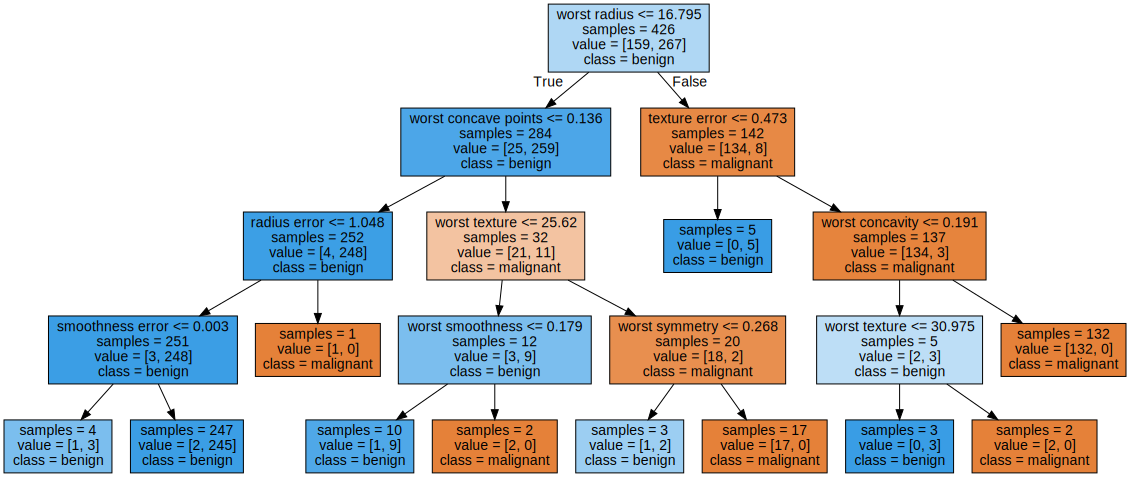

In [38]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 得到特征重要性

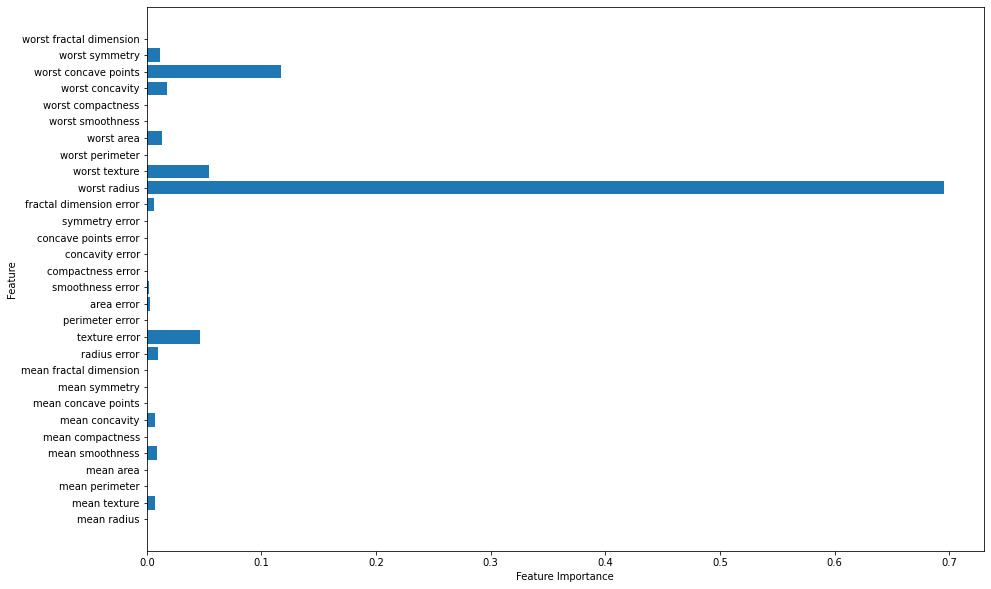

In [41]:
n_features = cancer.feature_names.shape[0]
plt.figure(figsize=(15, 10))
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(range(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()